# Effects of Blurring Images

See how blurring the image effects the persistent homology of $E(2)/\Gamma$ for images that previously are very noisy and have a weak signal. Blurring an image gives pixels information from their neighbors. For instance, given an all black area next to an all white area, black pixels near the boarder look the same as pixels in the center. However, after blurring, the pixels closer to the boarder are lighter, and thus carry more "information" about the overall image they exist in.

In [12]:
# importing packages
from ripser import ripser
from persim import plot_diagrams
from numpy import pi,sin,cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from math import dist
from math import sqrt
from math import ceil, exp
from PIL import Image
from PIL import ImageFilter
from IPython.display import display
import glob
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances

In [34]:
# FUNCTIONS

# Given an image, a lens size, and a translation, this translation_snapshot() 
# returns a snapshot after the translation is performed.
def translation_snapshot(img, lens_sz, translation):
    (a,b) = translation 
    translation = (-a,-b)
    (x,y) = upper_left_center(img, translation)
    (length, height) = img.size
    
    lens_corner_x = x - lens_sz/2.0 
    lens_corner_y = y - lens_sz/2.0 
    ret_img = img.crop((lens_corner_x,lens_corner_y, lens_corner_x+lens_sz, lens_corner_y+lens_sz))
    
    #make sure didn't fall off of the image
    (ret_length, ret_height) = ret_img.size
    if (lens_corner_x<0 or lens_corner_y<0 or lens_corner_x+lens_sz>length or lens_corner_y+lens_sz>height):
        print("I came off the page!")
        return False
    return ret_img



# Given a point with the origin at the center of the image, upper_left_center()
# returns the same point but with coordinates with an origin at the top left corner. 
# This is a helper function for translation_snapshot().
def upper_left_center(img, center):
    (x,y) = center
    (l, h) = img.size
    return (l/2.0+x , h/2.0 - y) 



# Given an image, a lens size, and an isometry, create_snapshot() performs the 
# isometry on the image and returns a lens size view of the image
def create_snapshot(img, lens_sz, isometry):
    (x,y,rotation) = isometry
    translation = (x,y)
    # turn from radian to degree
    rotation = 57.2958*rotation
    rot_img = img.rotate(rotation)
    return translation_snapshot(rot_img, lens_sz, translation)



# get_pixel_isom() converts a list of isometries into a list of the associated 
# pixel vector embeddings
def get_pixel_isom(isoms, img, lens):
    isom_images = []
    for iso in isoms:
        isom_images.append(create_snapshot(img, lens, iso))
    ret_lst = []
    for elem in isom_images:
        arr = np.asarray(elem)
        arr = arr.reshape(-1)
        ret_lst.append(arr)
    ret_lst = np.asarray(ret_lst)
    return ret_lst



# generate a list of random isometries such that the lens does not fall off of the page
def generate_isoms(img, lens_sz, n_samples):
    lens_range = ((min(img.size)/sqrt(2))-lens_sz)/2.0
    x_trans = (lens_range*2*np.random.random(n_samples) - lens_range)
    y_trans = (lens_range*2*np.random.random(n_samples) - lens_range)
    rotations = (2*pi*np.random.random(n_samples))
    isoms = []
    for i in range(n_samples):
        isoms.append((x_trans[i], y_trans[i], rotations[i]))
    return isoms



# generate a persistent homology graph with ripser and show the H1 intervals
def persistent_homology(img, lens_sz, n_samples, c):
    isoms = generate_isoms(img, lens_sz, n_samples)
    data = get_pixel_isom(isoms, img, lens_sz)
    
    # make persistent homology plot with ripser
    res = ripser(data, maxdim=1,  coeff =c)
    dgms = res['dgms']
    plt.figure(figsize = (4,4)) 
    plt.title("$\mathbb{Z} /$"+str(c)+"$\mathbb{Z}$")
    plot_diagrams(dgms)

    # see how many points are persisting
    H1 = res['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    print("largest 7 lengths of H1 intervals")
    print(d[:7])
    

## Point Group $C_4$

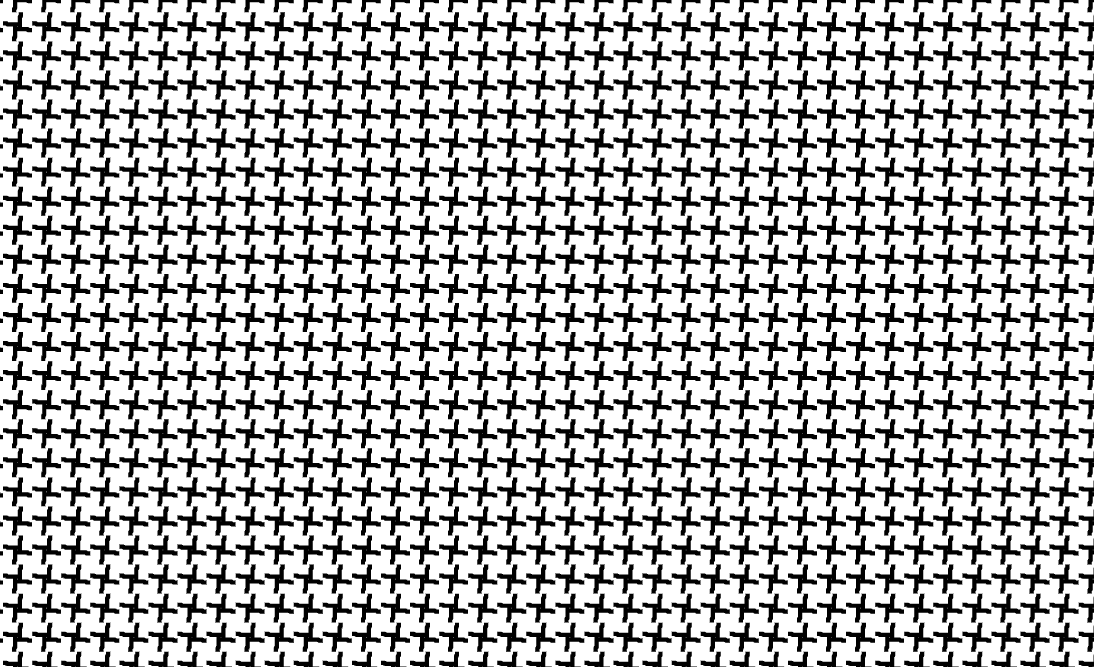

In [35]:
# Grab image from files
img_names = glob.glob('images/*C4pinwheel.png')
img = Image.open(img_names[0])
img = img.convert('L')
display(img)

Without any blurring, this is lense size 40 in coefficient 2 and 3

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[1592.670166015625, 1345.107421875, 1335.852294921875, 1309.2470703125, 1276.856201171875, 1230.313720703125, 1228.228759765625]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[1417.84375, 1307.606689453125, 1299.99853515625, 1288.956298828125, 1260.85009765625, 1234.80859375, 1220.57763671875]


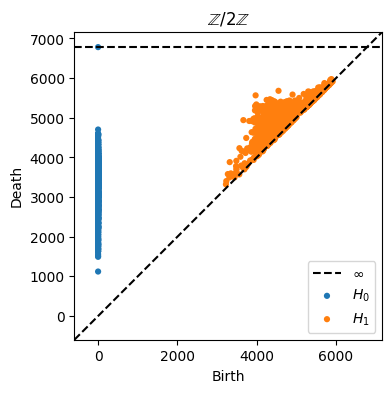

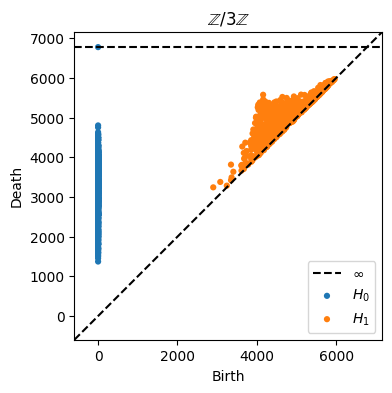

In [38]:
persistent_homology(img, 40, 1000, 2)
persistent_homology(img, 40, 1000, 3)

Looks like just noise. Blur the image and then try the same homology set up:

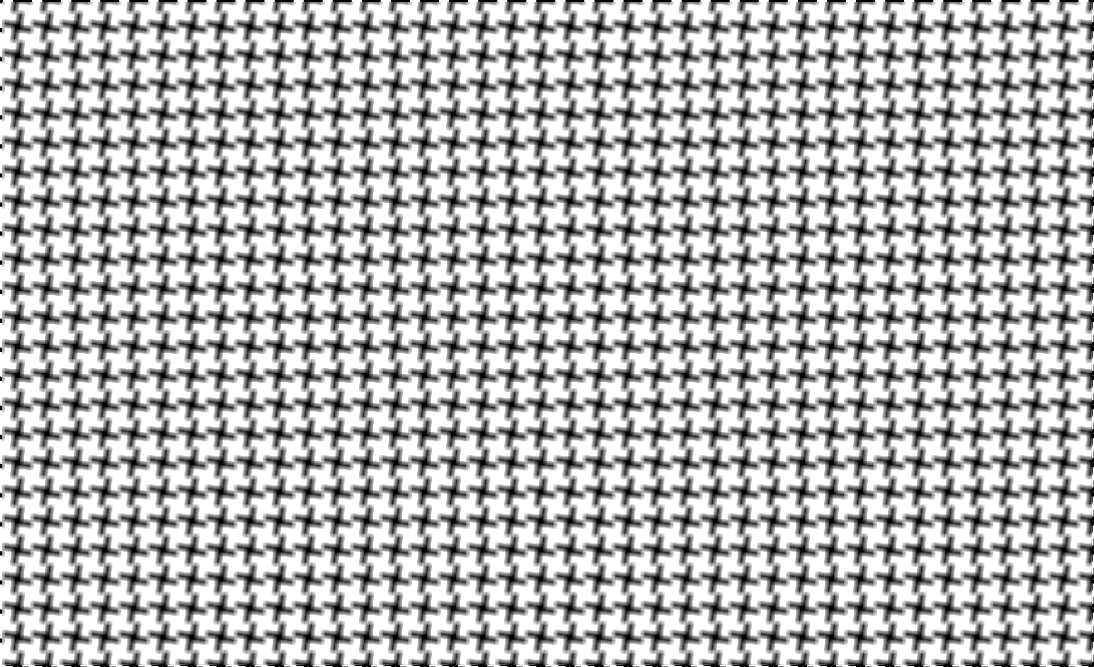

In [39]:
blurred_image = img.filter(ImageFilter.BLUR)
display(blurred_image)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[1829.2276611328125, 1676.1937255859375, 1210.5645751953125, 1183.3681640625, 1109.572998046875, 1073.249755859375, 1067.658447265625]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[1569.552734375, 1312.74853515625, 1175.3250732421875, 1143.62890625, 1130.950439453125, 1126.193603515625, 1096.08740234375]


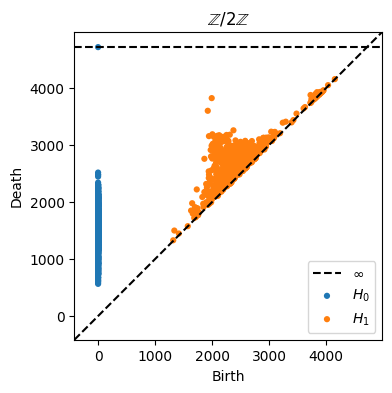

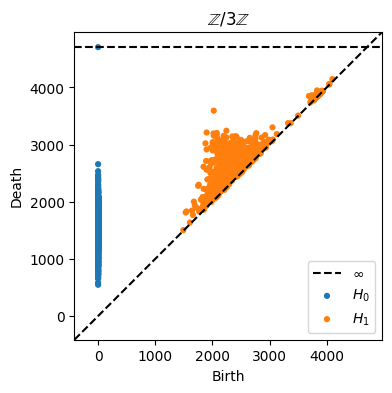

In [40]:
persistent_homology(blurred_image, 40, 1000, 2)
persistent_homology(blurred_image, 40, 1000, 3)

Now these results indicate that there are two $H_1$ homology classes over $Z_2$ and one over $Z_3$, which is what we expect for $C_4$!

## Point Group $C_6$

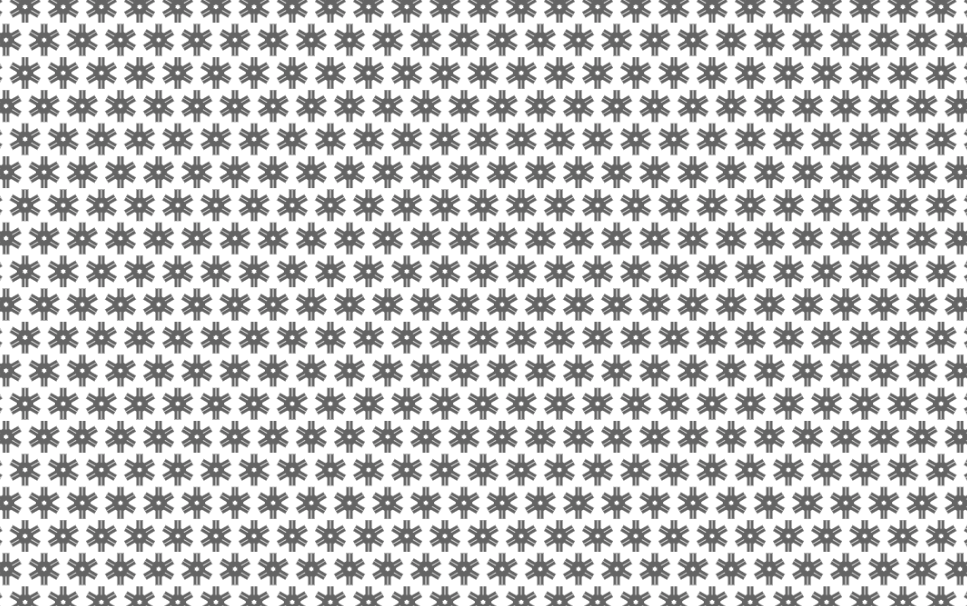

In [46]:
# Grab image from files
img_names = glob.glob('images/*C6 star.png')
img = Image.open(img_names[0])
display(img)

Without any blurring with lens size 100:

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[4741.3564453125, 3121.2470703125, 2970.1376953125, 2850.4189453125, 2822.5322265625, 2713.380859375, 2670.5771484375]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[4974.7666015625, 3000.7626953125, 2928.1884765625, 2892.8740234375, 2884.7978515625, 2878.7626953125, 2824.228515625]


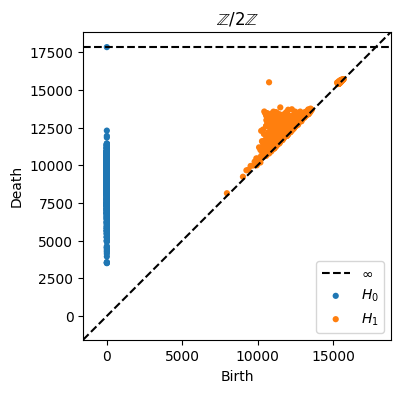

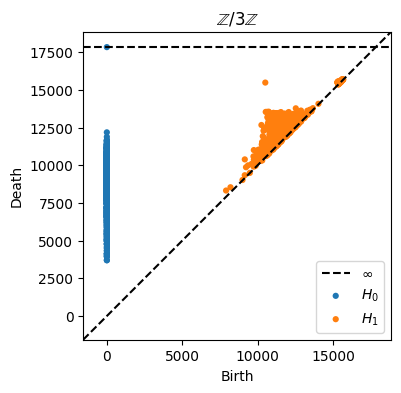

In [47]:
persistent_homology(img, 100, 1000, 2)
persistent_homology(img, 100, 1000, 3)

These results indicate what we expect for $C_6$, but the signal is weak. Now trying the blurred image:

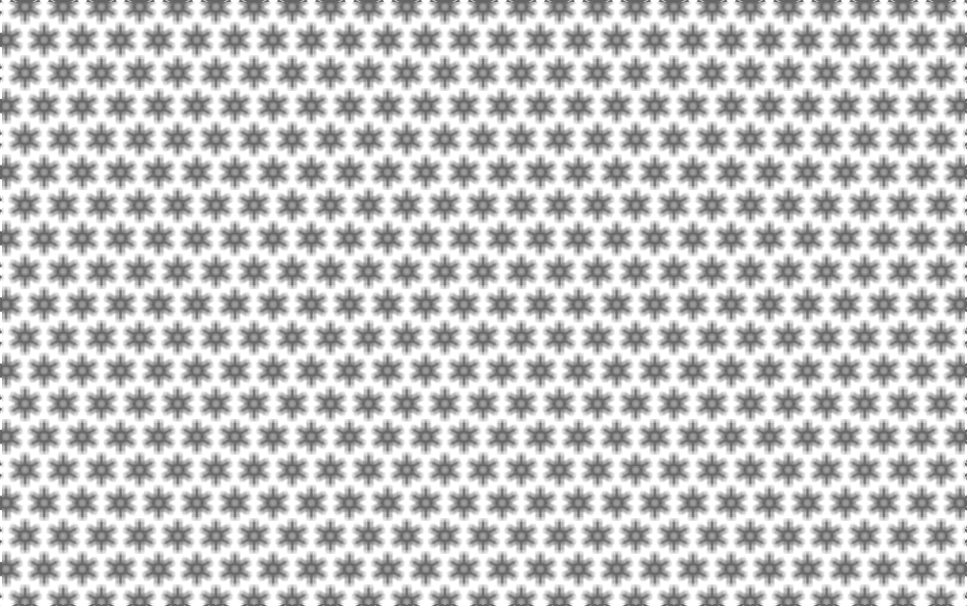

In [48]:
blurred_image = img.filter(ImageFilter.BLUR)
display(blurred_image)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[5879.40283203125, 3236.6044921875, 3124.07666015625, 3028.2392578125, 3014.41162109375, 3011.2802734375, 2986.98828125]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[6170.04736328125, 3224.8017578125, 3112.12646484375, 3106.0205078125, 3001.150390625, 2931.86181640625, 2925.82958984375]


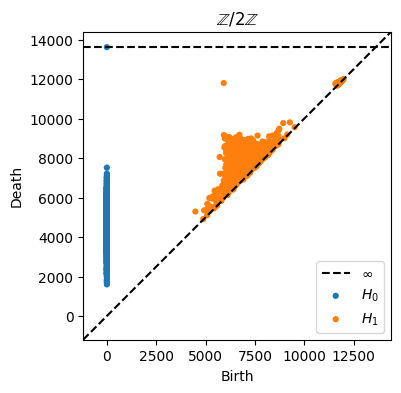

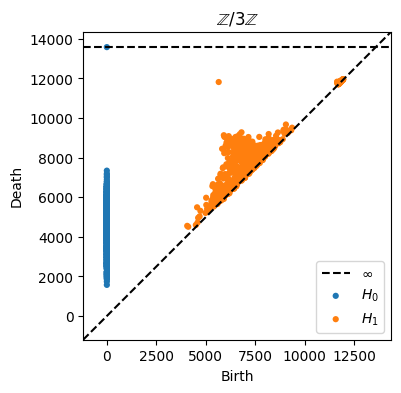

In [49]:
persistent_homology(blurred_image, 100, 1000, 2)
persistent_homology(blurred_image, 100, 1000, 3)

The blurring made the signal much clearer, as the persisting point is much farther from the noise.

Unfortunately blurring does not do much for the other groups.

## Point Group $C_3$

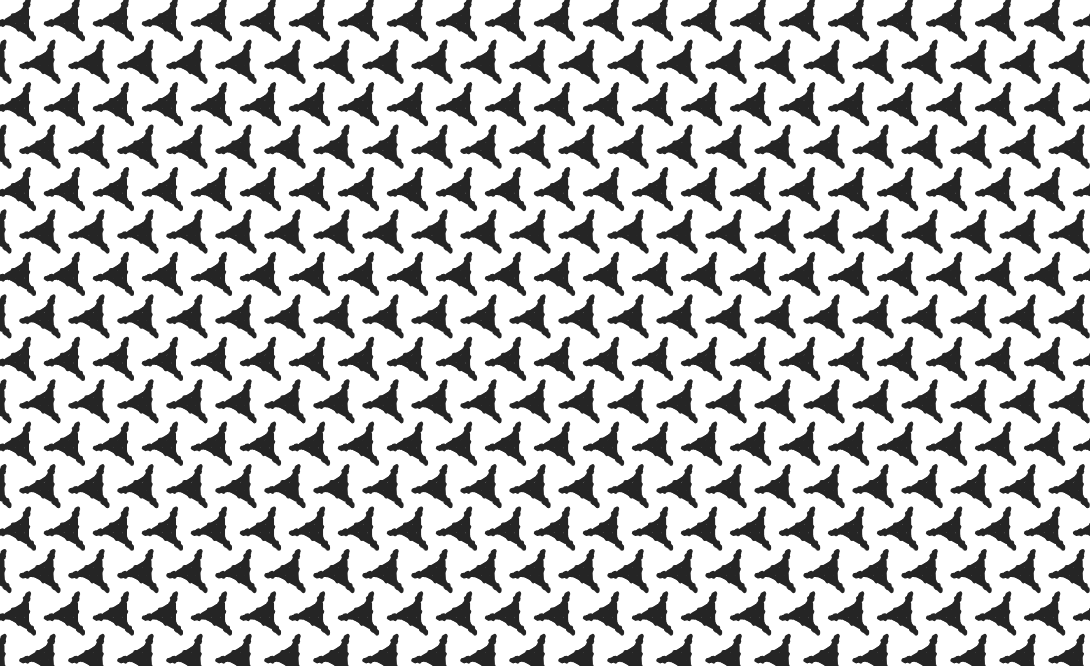

In [52]:
# Grab image from files
img_names = glob.glob('images/*C3 triangles.png')
img = Image.open(img_names[0])
display(img)

Without any blurring:

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[6593.361328125, 6211.779296875, 6116.408203125, 5918.6875, 5887.189453125, 5735.451171875, 5729.462890625]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[8931.662109375, 6331.16796875, 6007.568359375, 5966.654296875, 5948.212890625, 5940.59765625, 5697.20703125]


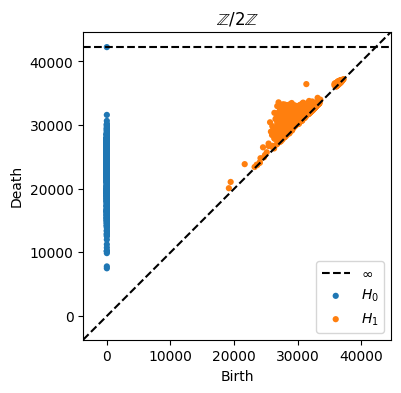

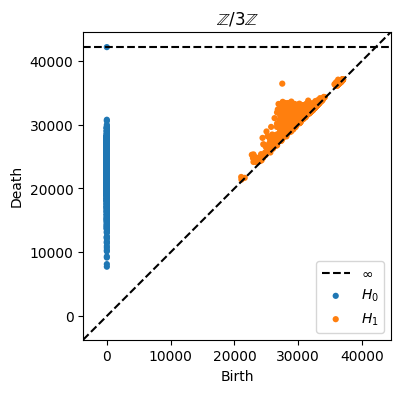

In [53]:
persistent_homology(img, 160, 1000, 2)
persistent_homology(img, 160, 1000, 3)

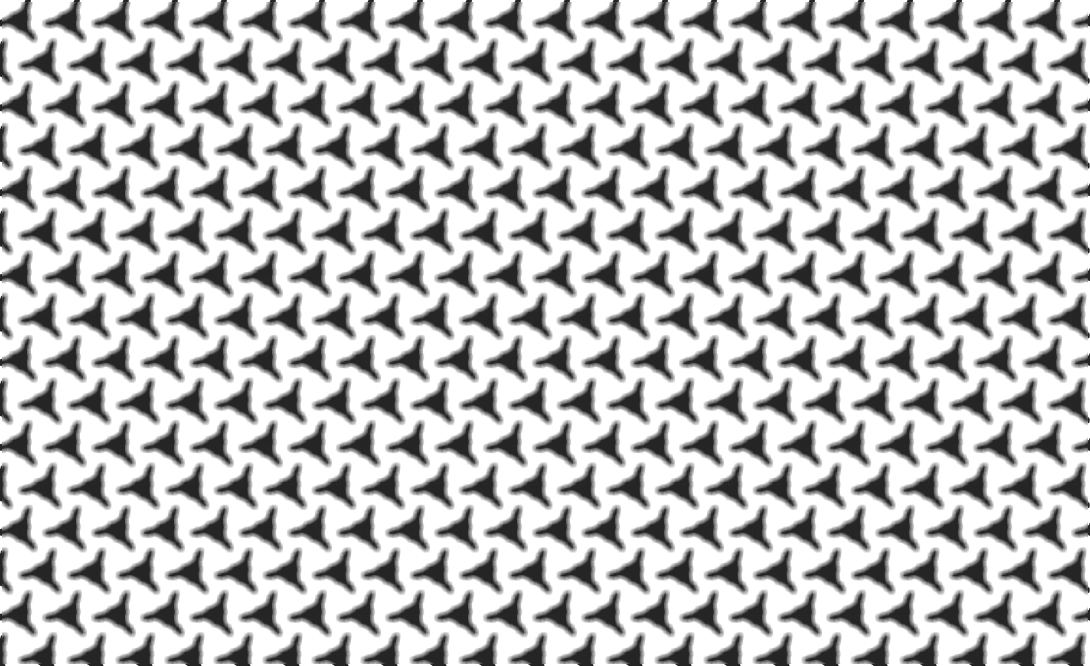

In [54]:
blurred_image = img.filter(ImageFilter.BLUR)
display(blurred_image)

Now the blurred results:

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[7234.220703125, 7162.169921875, 6927.25390625, 6610.765625, 6570.837890625, 6455.021484375, 6451.75]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[10698.255859375, 7422.3359375, 7097.6484375, 6962.900390625, 6904.0546875, 6834.234375, 6664.013671875]


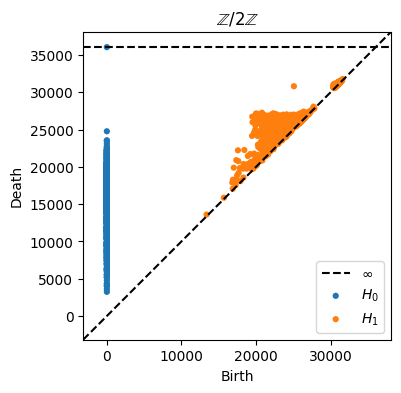

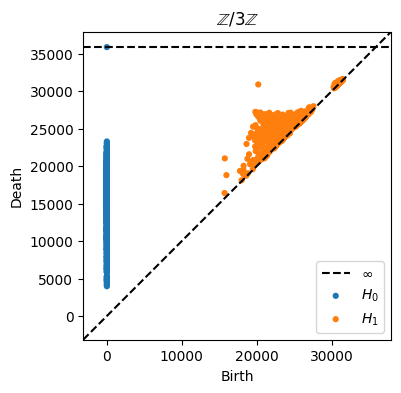

In [56]:
persistent_homology(blurred_image, 160, 1000, 2)
persistent_homology(blurred_image, 160, 1000, 3)

Now we get a more clear signal, but it is the one that we would expect for $C_6$.

## Point Group: $C_2$

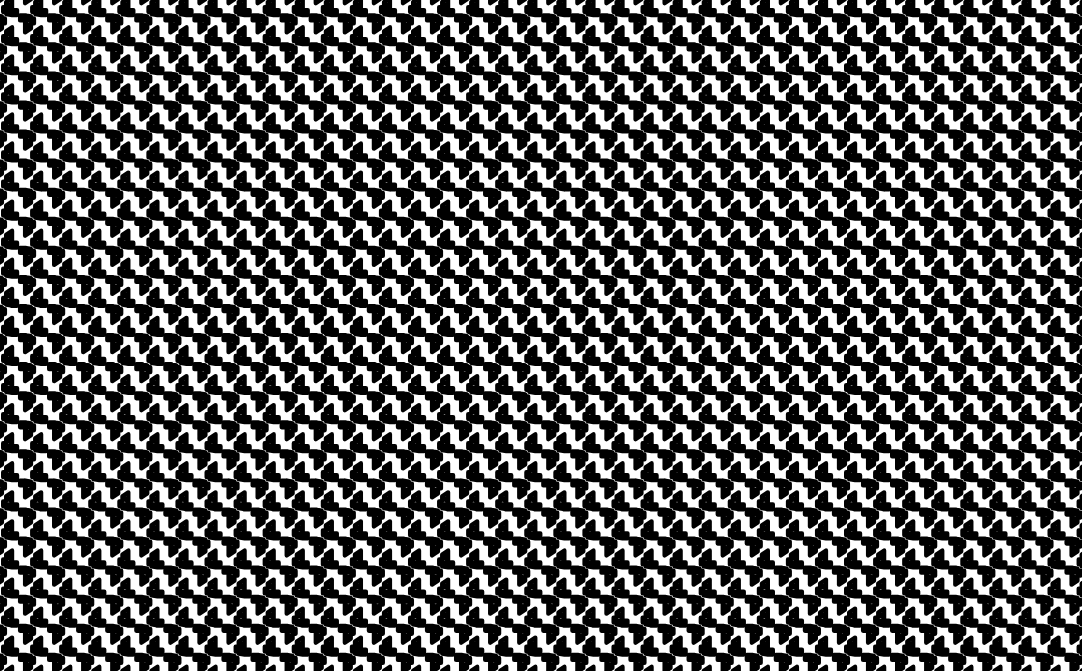

In [57]:
# Grab image from files
img_names = glob.glob('images/*C2bow.png')
img = Image.open(img_names[0])
display(img)

Without blurring:

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[2829.8876953125, 2554.3359375, 2468.314453125, 2448.1025390625, 2417.119140625, 2403.9345703125, 2390.4033203125]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[2985.009765625, 2596.8798828125, 2583.65625, 2544.4384765625, 2502.158203125, 2477.642578125, 2474.28515625]


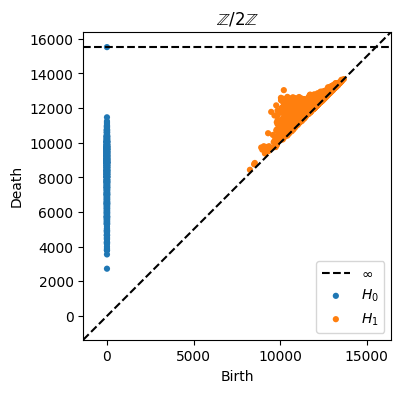

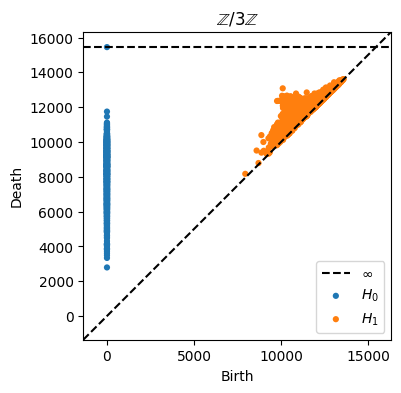

In [58]:
persistent_homology(img, 50, 1000, 2)
persistent_homology(img, 50, 1000, 3)

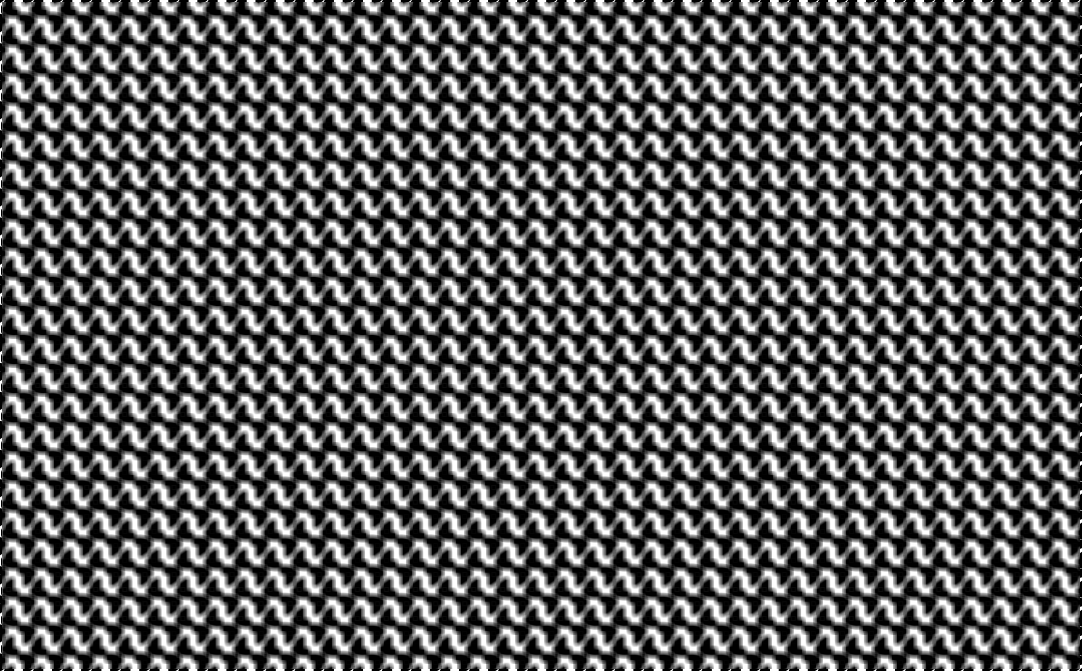

In [59]:
blurred_image = img.filter(ImageFilter.BLUR)
display(blurred_image)

Now with blurring:

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[3278.08740234375, 3046.1015625, 2922.931640625, 2916.01513671875, 2900.25, 2894.16650390625, 2887.1123046875]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[3512.3466796875, 3049.23681640625, 3032.36083984375, 2996.78515625, 2948.193359375, 2911.68115234375, 2820.28076171875]


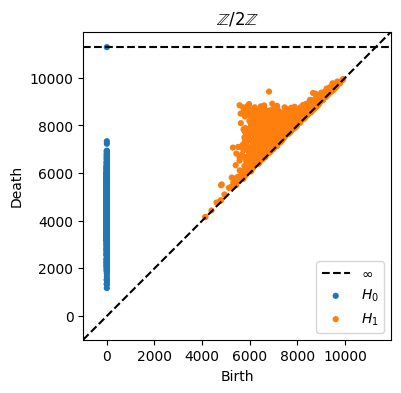

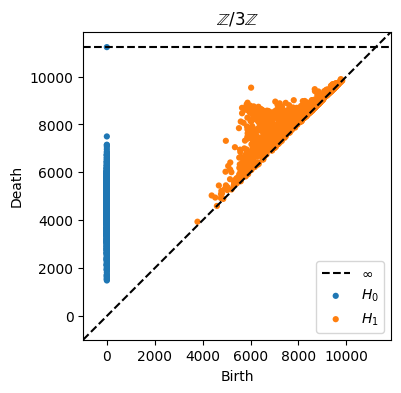

In [60]:
persistent_homology(blurred_image, 50, 1000, 2)
persistent_homology(blurred_image, 50, 1000, 3)

Even with the blurring, we still just get noise and a very weak signal.

## Point Group: $C_1$

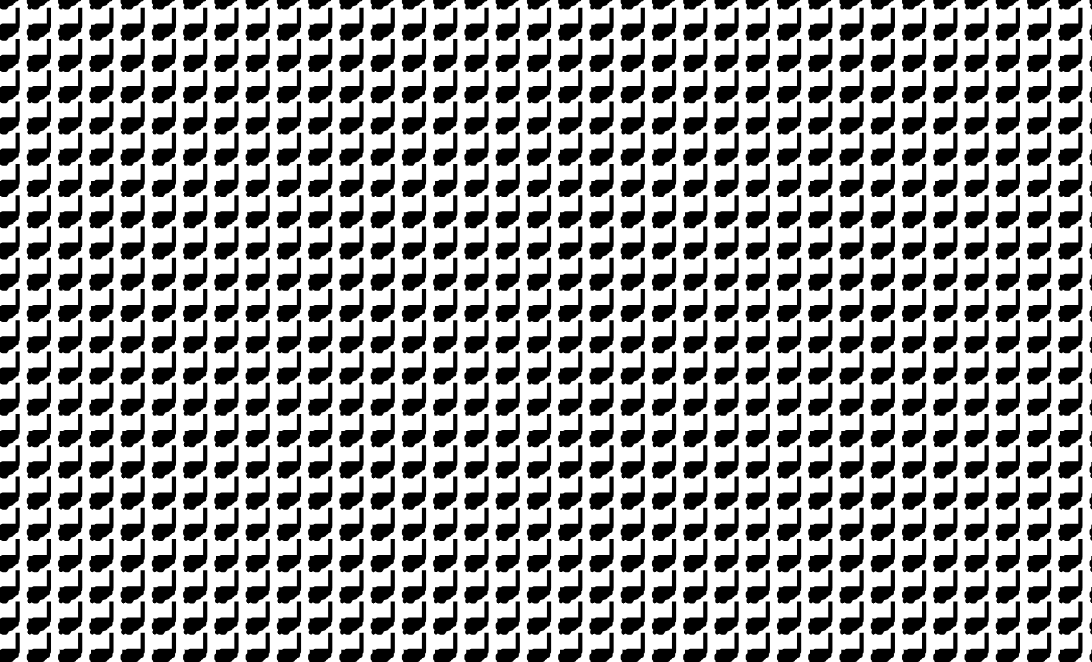

In [62]:
# Grab image from files
img_names = glob.glob('images/*C1music.png')
img = Image.open(img_names[0])
display(img)

Without blurring:

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[1969.38525390625, 1695.9541015625, 1680.44482421875, 1677.73291015625, 1665.0859375, 1653.2294921875, 1634.81494140625]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[1996.64208984375, 1860.28759765625, 1835.158203125, 1811.79150390625, 1737.14013671875, 1721.93310546875, 1676.0546875]


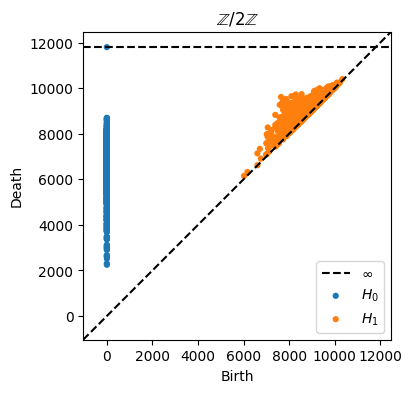

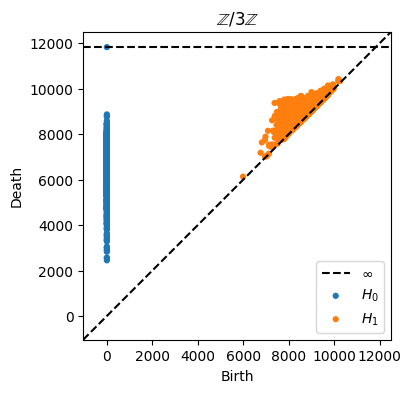

In [63]:
persistent_homology(img, 40, 1000, 2)
persistent_homology(img, 40, 1000, 3)

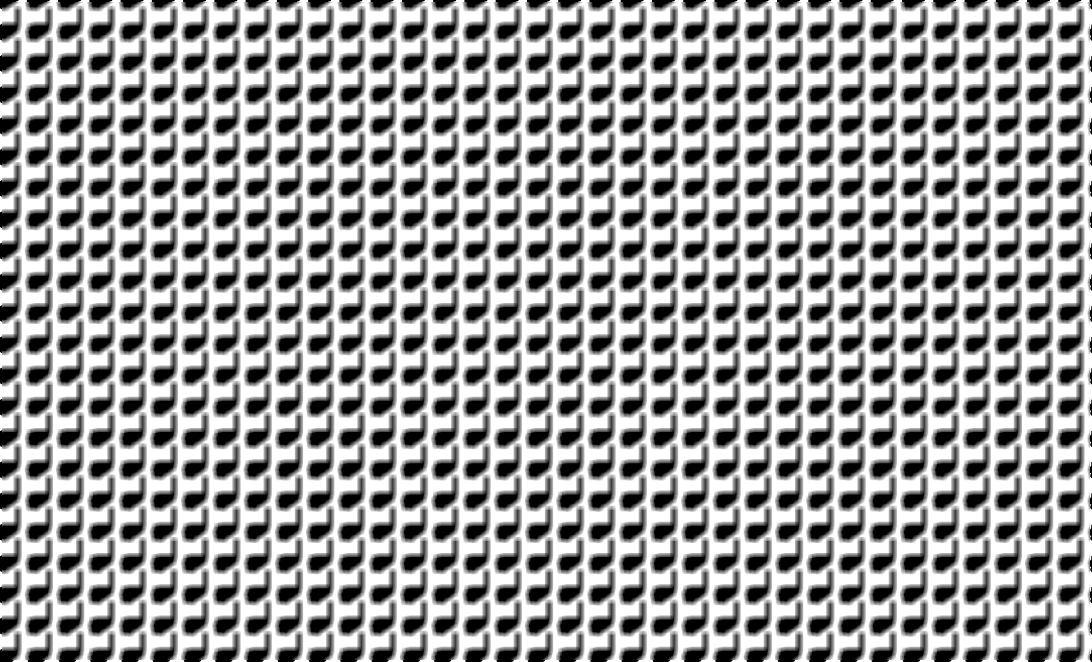

In [64]:
blurred_image = img.filter(ImageFilter.BLUR)
display(blurred_image)

Now with blurring:

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[2621.4228515625, 1911.62060546875, 1788.17724609375, 1769.28955078125, 1702.6689453125, 1682.9296875, 1667.1865234375]


/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[2183.423828125, 1855.85009765625, 1767.51220703125, 1752.76611328125, 1724.009765625, 1700.14990234375, 1672.56201171875]


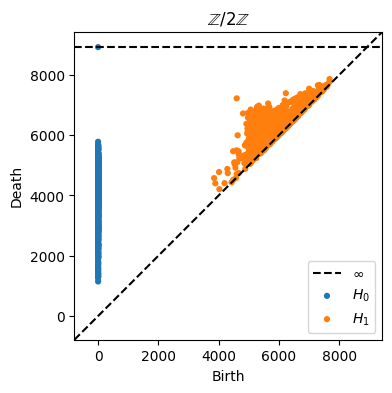

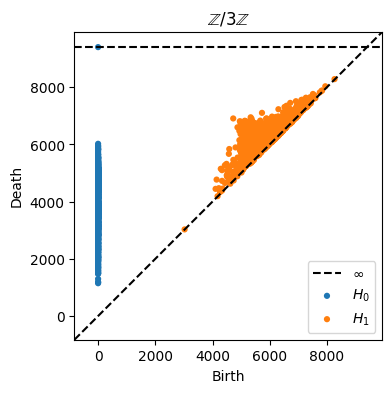

In [65]:
persistent_homology(blurred_image, 40, 1000, 2)
persistent_homology(blurred_image, 40, 1000, 3)

Even with blurring, we still just get noise. In general, C4 and C6 are the groups that usually get clear and correct signals, and the blurring seems to further clear the signal for them. However, we generally do not get good results for C1 C2 and C3, and the blurring does not make a valuable difference in these cases. 

# Effects of Softmax Embedding

Let $x\in \mathbb{R}^K$ be a vector that represents the pixel colorings of an image. The softmax functions maps $x$ to $\sigma(x) \in (0,1)\subset \mathbb{R}^K$ where the $i^{th}$ component of $\sigma(x)$ is 

$$ \frac{e^{x_i}}{\sum_{j=1}^Ke^{x_j}}$$

Note that the sum of the components of $\sigma(x)$ is 1, and when applied to an image only the brightest parts will be highlighted.

We test this softmax embedding on functions that define wallpaper tilings on $\mathbb{R}^2$.

In [26]:
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    return d[:10]

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output


We define a variant of softmax that makes bright pixels brighter *and* dark pixels darker

In [14]:
def softmax_variant(vector):
    sum_exp = 0
    for x in vector:
        sum_exp = sum_exp + exp(abs(x))
    for i in range(len(vector)):
        if vector[i] >= 0:
            vector[i] = exp(vector[i])/sum_exp
        else: 
            vector[i] = - exp(abs(vector[i]))/sum_exp
    return vector

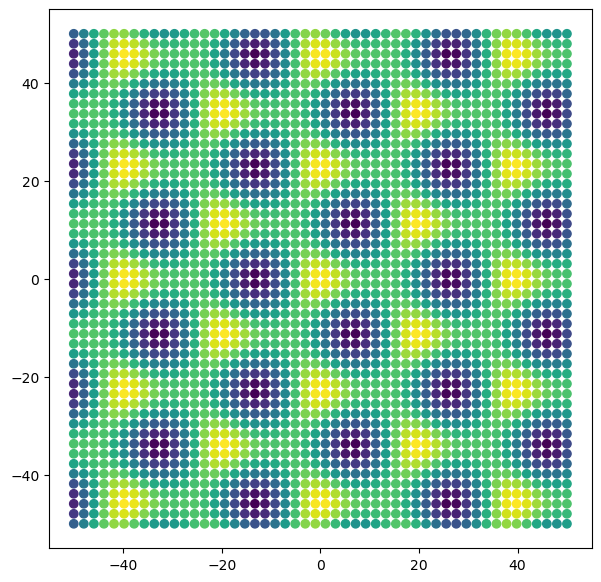

In [15]:
def c3(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S

view_window_continuous(c3, 50,100)

Let's look at our image after performing the softmax variant

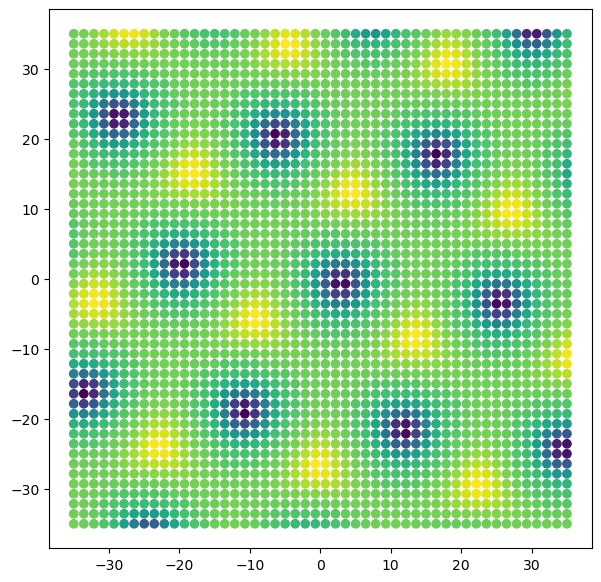

In [16]:
pixels = get_pixels(num_pixels=50, window_size=70)
isos_inv = generate_isom(n_isos=10, x_translate=200, y_translate=200)
colors = []
for i in isos_inv:
    colors.append(softmax_variant(new_colors(pixels = pixels, iso_inv = i, image_function = c3)))
    
x_points = []
y_points = []
for i in range(len(pixels)):
    x_points.append(pixels[i][0])
    y_points.append(pixels[i][1])
    
fig = plt.figure(figsize = (7, 7))
ax = plt.axes()
ax.scatter(x_points, y_points, c = colors[0])
plt.show()

Softmax seems to get rid of image features that aren't as important, making the $C_3$ symmetry more obvious.

In [27]:
def matrix_of_images_softmax(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([softmax_variant(new_colors(pixels, i, image_function))])
    M = np.concatenate(vectors, axis=0 )
    return M

def pipeline_softmax(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images_softmax(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


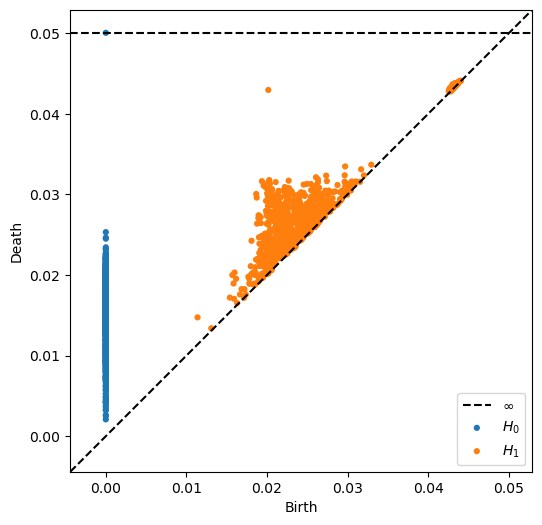

In [28]:
output = pipeline_softmax(image_function=p3, num_pixels = 50, window_size = 50, n_isos=1000, x_translate=200, y_translate=200, maxdim=1, coeff=2)
plot_dgms(output)

In [29]:
persistent_H1_intervals(output)

[0.02279781550168991,
 0.012274926528334618,
 0.01171957328915596,
 0.011507155373692513,
 0.011494150385260582,
 0.01139664463698864,
 0.011320341378450394,
 0.011076511815190315,
 0.01097581535577774,
 0.010883158072829247]

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


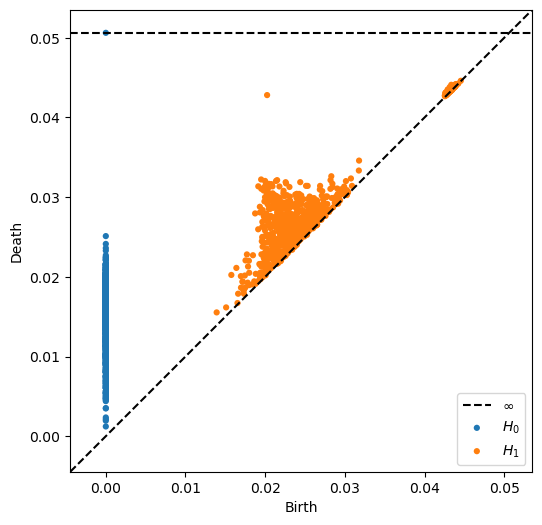

In [30]:
output = pipeline_softmax(image_function=p3, num_pixels = 50, window_size = 50, n_isos=1000, x_translate=200, y_translate=200, maxdim=1, coeff=3)
plot_dgms(output)

In [31]:
persistent_H1_intervals(output)

[0.022567756474018097,
 0.012724373489618301,
 0.012222912162542343,
 0.012046866118907928,
 0.01173861138522625,
 0.011537784710526466,
 0.011369254440069199,
 0.011299874633550644,
 0.011157404631376266,
 0.011024253442883492]

Unfortunately, the persistent homology calculation remains the same as found in 4_phom_identification, which was incorrect and seemed to be mistaking the $C_3$ for $C_6$.

# Effects of Hilbert Embedding 

The problem we seem to be having with the $C_3$ image function pictured below is a "hallucination" of rotational symmetries that would exist in the $C_6$ case, but not $C_3$. 

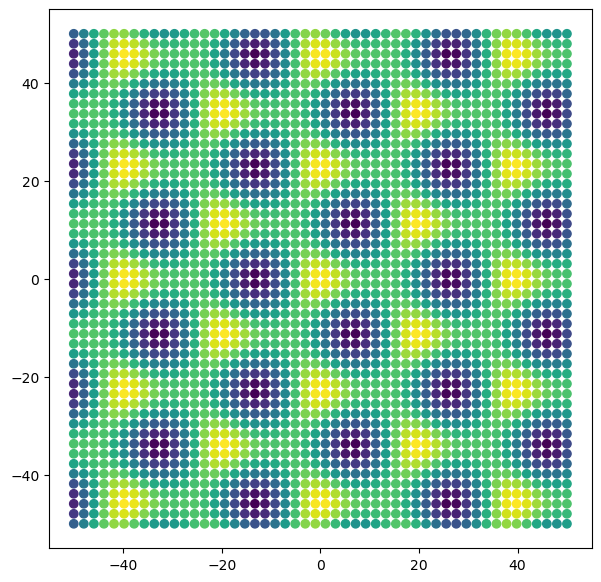

In [42]:
view_window_continuous(c3, 50,100)

To investigate this problem, consider the distance matrix below. This matrix encodes the pairwise Euclidean distances between a series of 100 images. These images are generated from a lens applied to 100 different rotational isometries of the cartesian plane. In particular, each isometry is a rotation around the point $(27,23.5)$, which is roughly at the center of one of purple blobs in the $C_3$ image. Throughout a $2 \pi$ rotation around this point, the distance matrix indicates that two images that differ by a $\pi/3$ rotation in their corresponding isometries have a small distance between them. Since this is a $C_3$ image, we would want this to be the case for $2\pi/3$ rotational differences. Thus the way we have embedded these images 

In [39]:
def compose_isoms(i1,i2, i3):
    def comp(x,y):
        x2 = i1(x,y)[0]
        y2 = i1(x,y)[1]
        x3 = i2(x2,y2)[0]
        y3 = i2(x2,y2)[1]
        return i3(x3,y3)
    return comp

def view_dist_matrix(image_function, distance_function, num_pixels, window_size, n_isos, title):
    
    isoms = []
    for i in range(n_isos):
        theta = (2*pi)/(n_isos-1) * i 
        isom1 = isom(-27,-23.5,0)
        isom2 = isom(0,0,theta)
        isom3 = isom(27,23.5,0)
        f = compose_isoms(isom1,isom2,isom3)
        isoms.append(f)
    
    pixel_colorings = []
    for f in isoms:
        #view_isom(isom_inv =f , image_function=image_function, p=p, x_size=y_size,y_size=y_size)
        pixels = get_pixels(num_pixels, window_size)
        point = new_colors(pixels, iso_inv=f, image_function=p3)
        pixel_colorings.append(point)
    
    x = range(n_isos)
    y = range(n_isos)
    
    x_points = []
    y_points = [] 
    
    for i in x:
        for j in y:
            x_points.append(i)
            y_points.append(j)
            
    M = np.zeros((n_isos,n_isos))
    for i in range(n_isos):
        for j in range(n_isos):
            M[i][j] = distance_function(pixel_colorings[i], pixel_colorings[j])

    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    plt.title(title)
    plt.xlabel('indexed images')
    plt.ylabel('indexed images') 
    scatter = ax.scatter(x_points, y_points, c = np.concatenate(M),cmap='viridis')
    plt.legend(*scatter.legend_elements())
    plt.show()

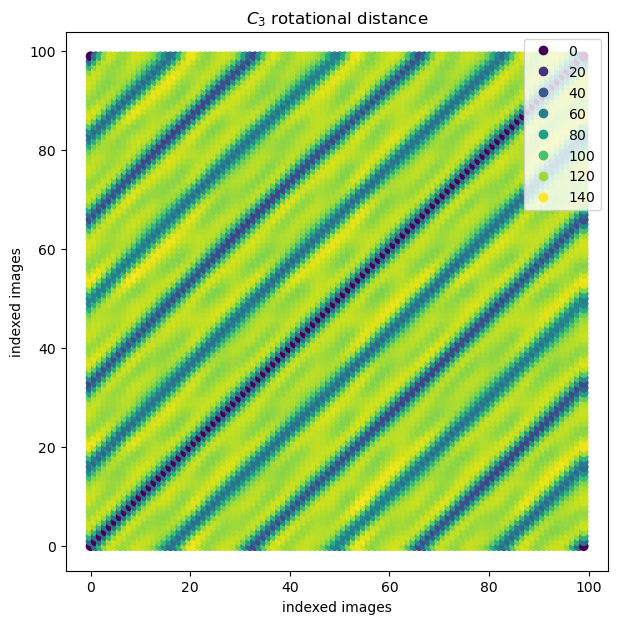

In [41]:
view_dist_matrix(image_function=p3, distance_function=dist, num_pixels = 50, window_size = 50, n_isos=100, title='$C_3$ rotational distance')

In [ ]:
The hilbert curve is a continuous, space-filling curve. 